In [2]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("../data/전처리데이터/성동구 최종 데이터.csv", encoding='cp949')
print(df.shape)
print(df.head())
print(df.columns)

(432, 18)
   Unnamed: 0  ARS-ID  버스 총 승차수  쉼터여부    NODE_ID            정류소명         위도  \
0           0    4001     39270     0  103000001         답십리역사거리  37.565426   
1           1    4002     37286     0  103000002  청년회의소.서울새활용플라자  37.561952   
2           2    4003     61371     0  103000003            장한평역  37.561131   
3           3    4101     17969     1  103000004           상왕십리역  37.564279   
4           4    4102     35007     1  103000005           상왕십리역  37.564609   

           경도  버스 수                                          버스 노선 리스트  \
0  127.054368     6        ['9403', '370', '303', 'N30', '721', '130']   
1  127.060479     9  ['9403', '3216', '2221', '370', '3220', '303',...   
2  127.066098    10  ['9403', '2416', '3216', '2221', '370', '3220'...   
3  127.029260     5             ['2012', 'N62', '2014', '2015', '463']   
4  127.028642    11  ['302', '2013', '2012', 'N62', '2014', '463', ...   

   평균 배차 간격  최대 배차 간격 가장 가까운 지하철역  지하철역 최단거리(m)   도로명      도로폭  도로폭_숫자

In [4]:
# 결측 값 측정
df.isnull().sum()

Unnamed: 0      0
ARS-ID          0
버스 총 승차수        0
쉼터여부            0
NODE_ID         0
정류소명            0
위도              0
경도              0
버스 수            0
버스 노선 리스트       0
평균 배차 간격        0
최대 배차 간격        0
가장 가까운 지하철역     0
지하철역 최단거리(m)    0
도로명             0
도로폭             0
도로폭_숫자          0
18세 이상          0
dtype: int64

In [5]:
import scipy.stats as stats
df1 = df[['쉼터여부','버스 수','버스 총 승차수','최대 배차 간격','지하철역 최단거리(m)','도로폭_숫자','18세 이상']]
print(df1.corr(method='pearson'))
stats.pearsonr(df['쉼터여부'],df1.iloc[:,5])

                  쉼터여부      버스 수  버스 총 승차수  최대 배차 간격  지하철역 최단거리(m)    도로폭_숫자  \
쉼터여부          1.000000  0.347980  0.384830  0.124291     -0.032761  0.144372   
버스 수          0.347980  1.000000  0.669460  0.463855      0.032271  0.163099   
버스 총 승차수      0.384830  0.669460  1.000000  0.305087     -0.055040  0.173162   
최대 배차 간격      0.124291  0.463855  0.305087  1.000000     -0.007667  0.300551   
지하철역 최단거리(m) -0.032761  0.032271 -0.055040 -0.007667      1.000000  0.054187   
도로폭_숫자        0.144372  0.163099  0.173162  0.300551      0.054187  1.000000   
18세 이상       -0.104451 -0.057703 -0.073405 -0.218757     -0.256544 -0.396811   

                18세 이상  
쉼터여부         -0.104451  
버스 수         -0.057703  
버스 총 승차수     -0.073405  
최대 배차 간격     -0.218757  
지하철역 최단거리(m) -0.256544  
도로폭_숫자       -0.396811  
18세 이상        1.000000  


PearsonRResult(statistic=0.14437209709599896, pvalue=0.0026314972729344216)

<AxesSubplot:>

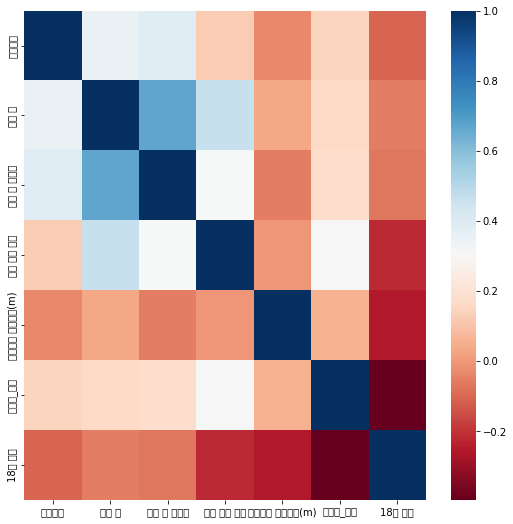

In [6]:
import seaborn as sns

plt.figure(figsize=(9, 9))
corr = df1.corr()
sns.heatmap(corr, cmap='RdBu')

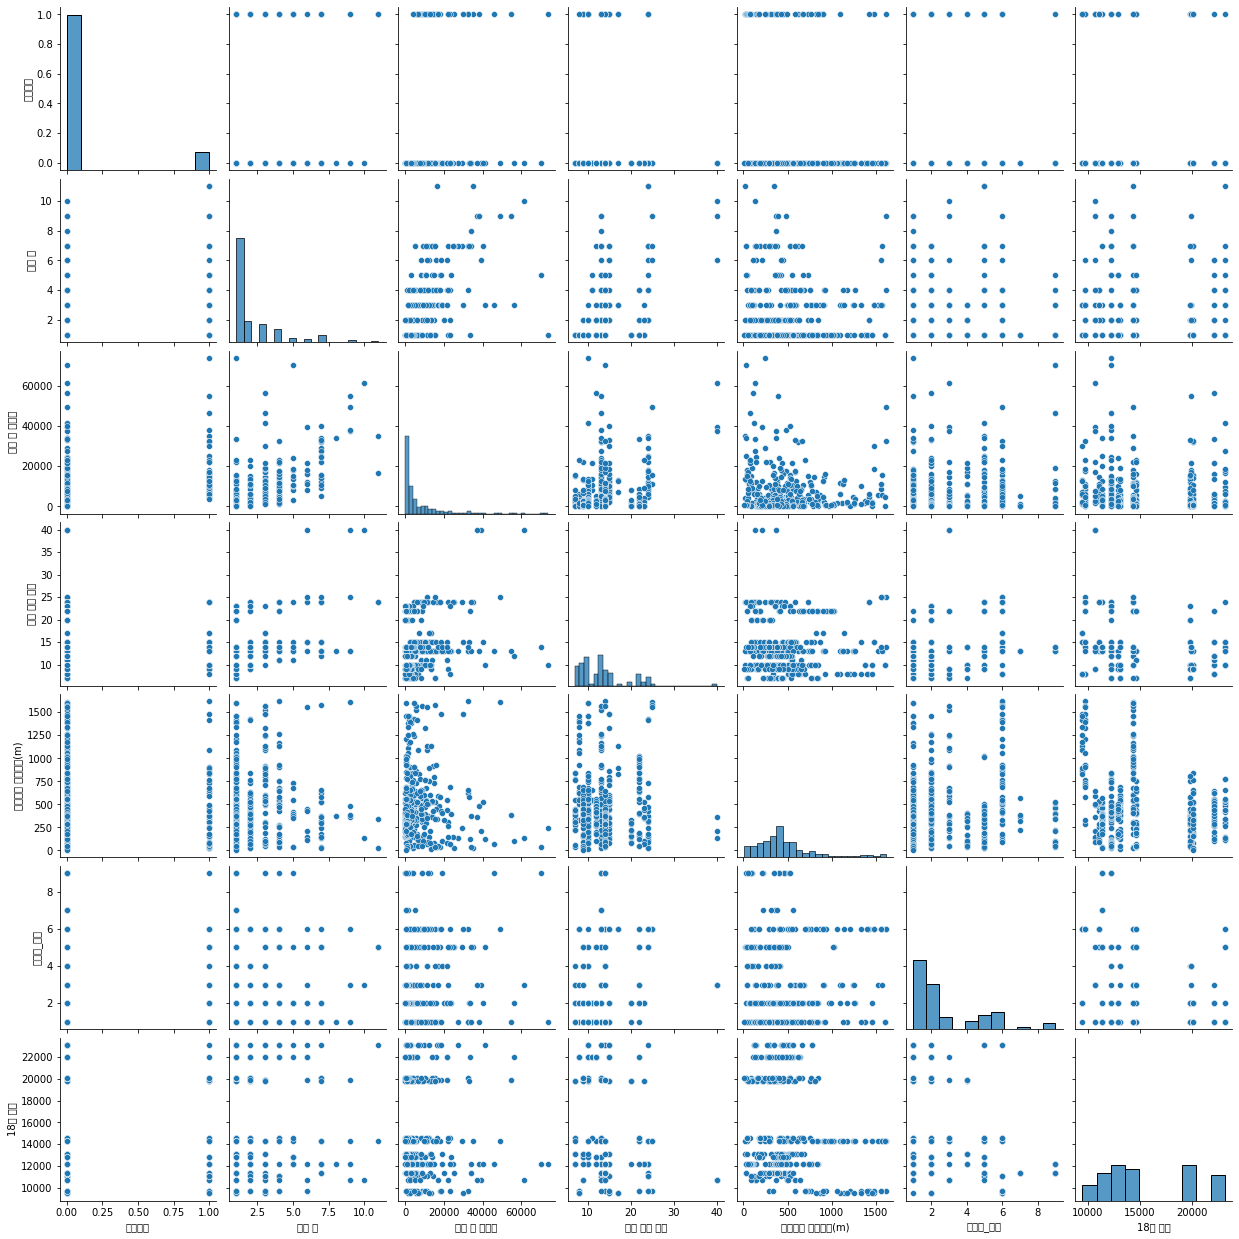

In [14]:
sns.pairplot(df1)

In [7]:
from sklearn.model_selection import train_test_split
X = df[['버스 수','버스 총 승차수','평균 배차 간격','지하철역 최단거리(m)','도로폭_숫자','18세 이상']]
y = df['쉼터여부']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [8]:
#standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [9]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X_train_over,y_train_over = smote.fit_resample(X_train_scaled,y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train_scaled.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (302, 6) (302,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (540, 6) (540,)
SMOTE 적용 후 레이블 값 분포: 
 0    270
1    270
Name: 쉼터여부, dtype: int64


In [10]:
model = LogisticRegression()
model.fit(X_train_over, y_train_over)
print(model.score(X_train_over, y_train_over))
print(model.score(X_test_scaled, y_test))

0.8592592592592593
0.7769230769230769


In [11]:
print(model.coef_)

[[ 0.8319722   1.02307675 -0.3276367  -0.21025668  0.48219892 -0.65487473]]


In [12]:
from sklearn.metrics import classification_report
y_pred=model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.79      0.87       117
           1       0.25      0.62      0.36        13

    accuracy                           0.78       130
   macro avg       0.60      0.71      0.61       130
weighted avg       0.88      0.78      0.81       130

